In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from collections import Counter

In [2]:
cancerds = datasets.load_breast_cancer();
x = cancerds.data;
y = cancerds.target

In [3]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 0);
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape);

(455, 30) (455,) (114, 30) (114,)


In [4]:
def fit(xtrain,ytrain):
    return;
def predictone(xtrain,ytrain,xi,k,p):
    distances = [];
    for i in range(len(xtrain)):
        dist = (((xtrain[i,:] - xi)**p).sum());
        distances.append([dist,i]);
    distances = sorted(distances);
    targets = [];
    for i in range(k):
        yi = ytrain[distances[i][1]];
        targets.append(yi);
    predi = Counter(targets).most_common(1)[0][0];
    return predi;
def predict(xtrain,ytrain,xtest,k = 5,p = 2):
    ypred = [];
    for xi in xtest:
        ypred.append(predictone(xtrain,ytrain,xi,k,p));
    return ypred;

In [5]:
fit(xtrain,ytrain);
ypred = predict(xtrain,ytrain,xtest,k = 9);

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(ytest,ypred);
print(score);

0.9649122807017544


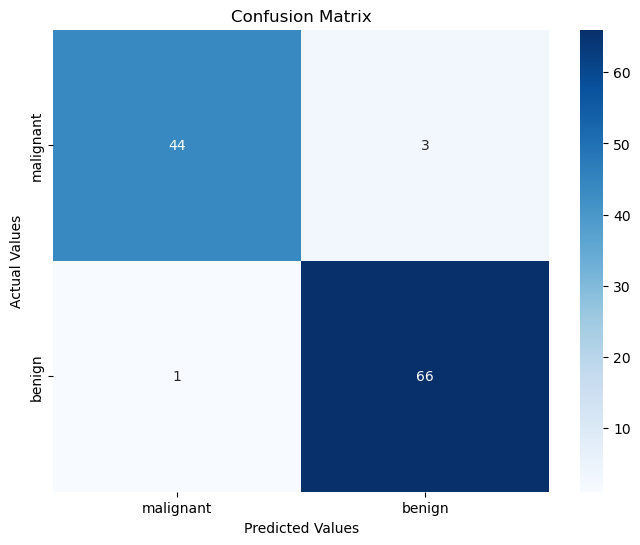

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
cm = confusion_matrix(ytest,ypred);
plt.figure(figsize = (8,6));
plt.title("Confusion Matrix");
arr = cancerds.target_names;
sns.heatmap(cm,annot = True,fmt = "d",cmap = "Blues",xticklabels = arr,yticklabels = arr);
plt.xlabel("Predicted Values");
plt.ylabel("Actual Values");

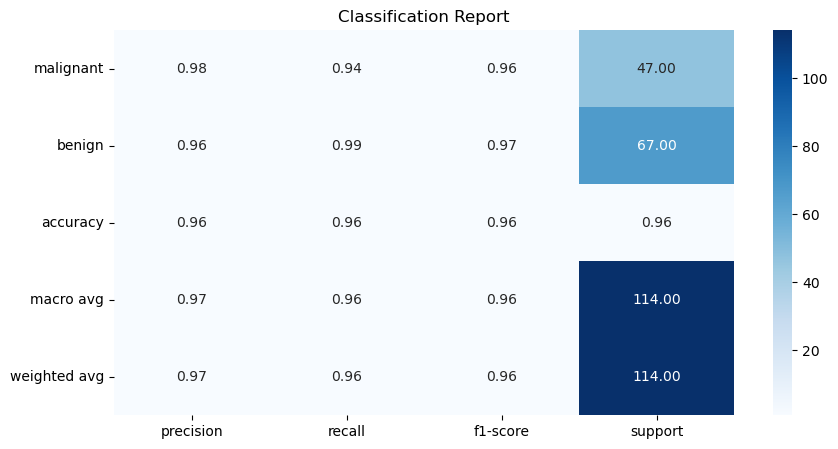

In [8]:
report = classification_report(ytest,ypred,output_dict = True,target_names = arr);
df = pd.DataFrame(report).transpose();
plt.figure(figsize = (10,5));
sns.heatmap(df,annot = True,fmt = ".2f",cmap = "Blues");
plt.title("Classification Report");

In [9]:
a = [1,0,1,1,1,1,0,2];
cnt = Counter(a);
print(cnt.most_common(1));
print(cnt.most_common(1)[0]);
print(cnt.most_common(1)[0][0]);

[(1, 5)]
(1, 5)
1
